## Discrete Fourier Transform (DFT)

Let's considered the periodic discrete time funcion $f[n]:\mathbb{N}\rightarrow\mathbb{R}$ such that:

$$x[n+N]=x[n]$$,

where $x[n]=x(n\Delta_t)$ with $n=0,\ldots,N-1$ and $\Delta_t$ represents the time-step used by the discretization process.

The above descrete funcion can be written in terms of its DT series (which can be interpreted as the Inverse Fourier Transform (IFFT)):

$$f[n]=\sum_{k=0}^{N-1}X[k]\exp\left(\frac{j2\pi k n\Delta_T}{N\Delta_t}\right)=\sum_{k=0}^{N-1}X[k]\exp\left(\frac{j2\pi k n}{N}\right)$$,

where $X[k]$ are the Fourier coefficients and $\omega_0=2\pi/N \Delta_t$ is the fundamental frequency. 

The coefficients $X[k]$ for $k=0,\ldots,N-1$ can be calculated via the Fast Fourier Transform (FFT), such that:

$$X[k]=\sum_{n=0}^{N-1}x[n]\exp\left(\frac{-j2\pi}{N}kn\right)$$.

It is important to notice that:

- $X[k]\in\mathbb{C}$
- $X[k]$ for $k\leq N/2$, represent the coefficient associated to positive frequencies
- $X[k]$ for $k\geq (N/2+1)$, represent the coefficient associated to negative frequencies
- $X[k]$ is a discretize version of the continuous spectrum X(f), i.e., $X[k]=X(k f_s)$, where $f_s=\frac{1}{N \Delta_t}$ is the sampling frequency.


According to the Nyquist's theorem: $f_s>2 BW_X$

## Example

Let's consider DFT of the following function:

$$f(t)=1\sin(2\pi 440 t)+0.5\sin(2\pi 880 t)$$

In [1]:
import os
import ltspice
import matplotlib.pyplot as plt
import numpy as np
import math

#%matplotlib inline

import mpld3
mpld3.enable_notebook()

In [2]:
def my_IFFT(freq,Y):
    """Compute the time waveform y for the positive spectrum Y"""
    
    #sampling frequency
    fs = freq[2]-freq[1]
    
    y = np.fft.irfft(Y)
    
    N = len(y)
    
    time = np.linspace(0,1/fs,N)
    
    y = y*N/2
          
    return time,y

In [3]:
def my_FFT(time,y):
    """Compute the spectrum of the signal y for positive harmonics only"""
    
    #time step
    DT = time[1]-time[0]
    
    #number of samples
    N = len(y)
    
    Y = 2*np.fft.rfft(y,N)/len(y)

    freq = np.fft.rfftfreq(N,DT)
    
    return freq,Y

No handles with labels found to put in legend.


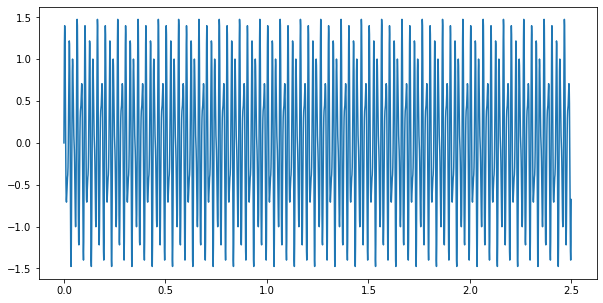

/Users/riccardotrinchero/opt/anaconda3/lib/python3.9/site-packages/mpld3/mplexporter/exporter.py:179: UserWarning: Legend element <matplotlib.offsetbox.HPacker object at 0x7faf2a96e850> not impemented
  warnings.warn("Legend element %s not impemented" % child)


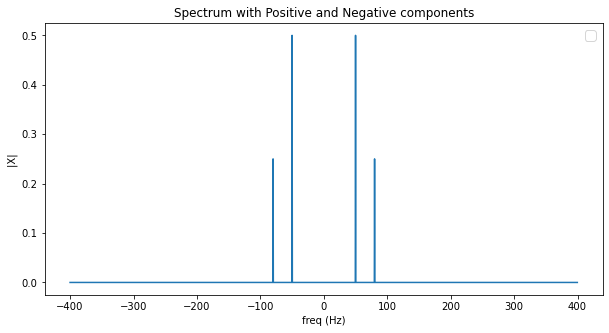

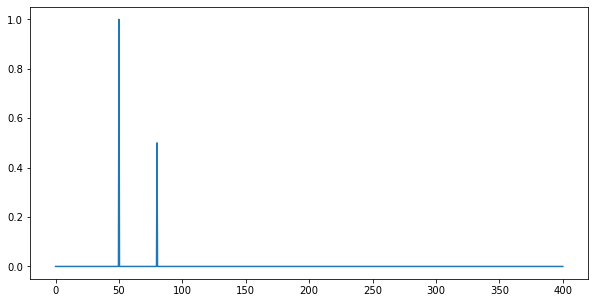

In [4]:
#FFT and IFFT test

# Number of sample points
N = 2000

#sampling rate (wav file)
fs = 800

# time step
DT = 1.0 / fs


time = np.linspace(0.0, DT*N, N, endpoint=False)
x = np.sin(50.0 * 2.0*np.pi*time) + 0.5*np.sin(80.0 * 2.0*np.pi*time)

plt.figure(figsize=(10, 5))
plt.plot(time,x)

# postive and negative spectrum
X_tmp = np.fft.fft(x)/x.shape
freq_tmp = np.fft.fftfreq(N,DT)

freq_pn = np.fft.fftshift(freq_tmp)
X_pn = np.fft.fftshift(X_tmp)

plt.figure(figsize=(10, 5))
plt.plot(freq_pn,np.abs(X_pn))

plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.xlabel('freq (Hz)')
plt.ylabel('|X| ')
plt.title('Spectrum with Positive and Negative components')

#plt.figure(figsize=(10, 5))
#plt.plot(freq_pn,np.angle(X_pn)*180/np.pi)

#positive spectrum only
freq_p,X_p = my_FFT(time,x)


plt.figure(figsize=(10, 5))
plt.plot(freq_p,np.abs(X_p))

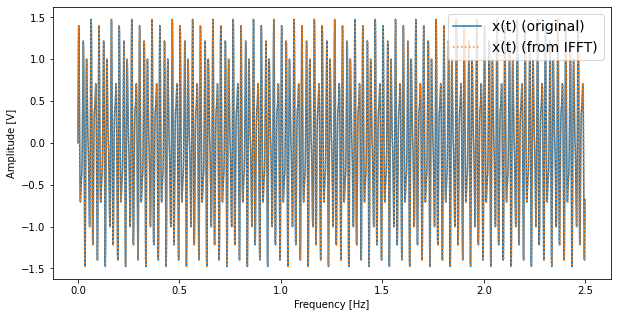

In [5]:
# IFFT for negative and positive frequency

x_ifft=np.real(np.fft.ifft(np.fft.fftshift(X_pn)))*X_pn.shape[0]

plt.figure(figsize=(10, 5))
plt.plot(time,x,label='x(t) (original)')
#plt.plot(time,x_ifft,label='x(t) (from IFFT)')

time_my,y_my = my_IFFT(freq_p,X_p)

plt.plot(time_my,y_my,':',label = 'x(t) (from IFFT)')


plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [V]")
plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})